In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import minmax_scale

In [2]:
amzn = pd.read_csv("D:/Technocolabs/Predicting-stock-prices-for-large-cap-technology-companies-DS-II-main/Datasets of Stocks Market and Stock News Articles/NASDAQ Datasets/Nasdaq Stocks/HistoricalData_AMZN.csv",parse_dates=['Date'],index_col=['Date'])
apple = pd.read_csv("D:/Technocolabs/Predicting-stock-prices-for-large-cap-technology-companies-DS-II-main/Datasets of Stocks Market and Stock News Articles/NASDAQ Datasets/Nasdaq Stocks/HistoricalData_APPLE.csv",parse_dates=['Date'],index_col=['Date'])
csco = pd.read_csv("D:/Technocolabs/Predicting-stock-prices-for-large-cap-technology-companies-DS-II-main/Datasets of Stocks Market and Stock News Articles/NASDAQ Datasets/Nasdaq Stocks/HistoricalData_CSCO.csv",parse_dates=['Date'],index_col=['Date'])
fb = pd.read_csv("D:/Technocolabs/Predicting-stock-prices-for-large-cap-technology-companies-DS-II-main/Datasets of Stocks Market and Stock News Articles/NASDAQ Datasets/Nasdaq Stocks/HistoricalData_FB.csv",parse_dates=['Date'],index_col=['Date'])
qcom = pd.read_csv("D:/Technocolabs/Predicting-stock-prices-for-large-cap-technology-companies-DS-II-main/Datasets of Stocks Market and Stock News Articles/NASDAQ Datasets/Nasdaq Stocks/HistoricalData_QCOM.csv",parse_dates=['Date'],index_col=['Date'])
sbux = pd.read_csv("D:/Technocolabs/Predicting-stock-prices-for-large-cap-technology-companies-DS-II-main/Datasets of Stocks Market and Stock News Articles/NASDAQ Datasets/Nasdaq Stocks/HistoricalData_SBUX.csv",index_col=['Date'])
tesla = pd.read_csv("D:/Technocolabs/Predicting-stock-prices-for-large-cap-technology-companies-DS-II-main/Datasets of Stocks Market and Stock News Articles/NASDAQ Datasets/Nasdaq Stocks/HistoricalData_TSLA.csv",index_col=['Date'])
msft = pd.read_csv("D:/Technocolabs/Predicting-stock-prices-for-large-cap-technology-companies-DS-II-main/Datasets of Stocks Market and Stock News Articles/NASDAQ Datasets/Nasdaq Stocks/MSFT.csv",index_col=['Date'])



In [3]:
apple.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
2021-06-08,$126.74,74403770,$126.6,$128.46,$126.2101
2021-06-07,$125.9,71057550,$126.17,$126.32,$124.8321
2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13


In [4]:
csco.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$54.02,14861230,$54.18,$54.42,$53.935
2021-06-08,$54.13,15329690,$53.97,$54.39,$53.89
2021-06-07,$53.92,14899750,$54.32,$54.44,$53.79
2021-06-04,$54.07,11676700,$53.435,$54.17,$53.435
2021-06-03,$53.33,17593100,$52.8,$53.555,$52.62


In [5]:
fb.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$330.25,13727950,$335.74,$336.8,$330
2021-06-08,$333.68,14580460,$336.7,$338.2999,$332.24
2021-06-07,$336.58,20136710,$329.48,$337.69,$328.93
2021-06-04,$330.35,13289380,$325.9,$332.455,$325.18
2021-06-03,$326.04,12610790,$325.78,$327.375,$323.48


In [6]:
qcom.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$132.89,6717243,$135.105,$135.35,$132.79
2021-06-08,$134.2,9657889,$134.06,$135.3895,$133
2021-06-07,$133.32,5563253,$133.7,$133.77,$132.64
2021-06-04,$134.34,7416675,$132.525,$135.05,$132.2
2021-06-03,$131.78,6643997,$132.65,$133.39,$131.42


In [7]:
sbux.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
06/09/2021,$111.39,3669725,$111.736,$112.19,$111.33
06/08/2021,$111.52,4669852,$111.38,$111.99,$110.86
06/07/2021,$111.33,4009023,$111.98,$112.2768,$110.99
06/04/2021,$111.99,4477543,$111.62,$112.065,$111.05
06/03/2021,$111.12,5723894,$112.01,$112.24,$110.15


In [8]:
tesla.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
06/09/2021,$598.78,16584570,$602.17,$611.79,$597.6301
06/08/2021,$603.59,26053410,$623.01,$623.09,$595.5
06/07/2021,$605.13,22543680,$591.825,$610,$582.88
06/04/2021,$599.05,24036900,$579.71,$600.61,$577.2
06/03/2021,$572.84,30111890,$601.8,$604.55,$571.22


In [9]:
msft.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
06/09/2021,$253.59,17937630,$253.81,$255.53,$253.21
06/08/2021,$252.57,22455000,$255.16,$256.01,$252.51
06/07/2021,$253.81,23079170,$249.98,$254.09,$249.81
06/04/2021,$250.79,25281090,$247.76,$251.65,$247.51
06/03/2021,$245.71,25307710,$245.22,$246.34,$243


# ###########################################################

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# apple data wrangling. 
apple.describe()

,Volume
count,2.516000e+03
mean,2.388826e+08
std,1.914594e+08
min,4.544820e+07
25%,1.092658e+08
50%,1.679334e+08
75%,3.022477e+08
max,1.498071e+09


In [12]:
apple.dtypes

Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [13]:
# Removing $ symbol and convert into float values for amazon
amzn['Close/Last'] = amzn['Close/Last'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
amzn['Open'] = amzn['Open'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
amzn['High'] = amzn['High'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
amzn['Low'] = amzn['Low'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))

amzn['Close/Last'] = amzn['Close/Last'].apply(lambda x : float(x))
amzn['Open'] = amzn['Open'].apply(lambda x :float(x))
amzn['High'] = amzn['High'].apply(lambda x :float(x))
amzn['Low'] = amzn['Low'].apply(lambda x : float(x))

amzn_cleaned = round(amzn,2)
amzn_cleaned.head()
############################################################################################################
# Removing $ symbol and convert into float values for apple
apple['Close/Last'] = apple['Close/Last'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
apple['Open'] = apple['Open'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
apple['High'] = apple['High'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
apple['Low'] = apple['Low'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))

apple['Close/Last'] = apple['Close/Last'].apply(lambda x : float(x))
apple['Open'] = apple['Open'].apply(lambda x :float(x))
apple['High'] = apple['High'].apply(lambda x :float(x))
apple['Low'] = apple['Low'].apply(lambda x : float(x))

apple_cleaned = round(apple,2)
#apple_cleaned.head()

############################################################################################################
# Removing $ symbol and convert into float values for csco

csco['Close/Last'] = csco['Close/Last'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
csco['Open'] = csco['Open'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
csco['High'] = csco['High'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
csco['Low'] = csco['Low'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))

csco['Close/Last'] = csco['Close/Last'].apply(lambda x : float(x))
csco['Open'] = csco['Open'].apply(lambda x :float(x))
csco['High'] = csco['High'].apply(lambda x :float(x))
csco['Low'] = csco['Low'].apply(lambda x : float(x))

csco_cleaned = round(csco,2)
#csco_cleaned.head()

############################################################################################################
# Removing $ symbol and convert into float values for facebook
fb['Close/Last'] = fb['Close/Last'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
fb['Open'] = fb['Open'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
fb['High'] = fb['High'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
fb['Low'] = fb['Low'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))

fb['Close/Last'] = fb['Close/Last'].apply(lambda x : float(x))
fb['Open'] = fb['Open'].apply(lambda x :float(x))
fb['High'] = fb['High'].apply(lambda x :float(x))
fb['Low'] = fb['Low'].apply(lambda x : float(x))

fb_cleaned = round(fb,2)
#fb_cleaned.head()

############################################################################################################
# Removing $ symbol and convert into float values for qcom 

qcom['Close/Last'] = qcom['Close/Last'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
qcom['Open'] = qcom['Open'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
qcom['High'] = qcom['High'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
qcom['Low'] = qcom['Low'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))

qcom['Close/Last'] = qcom['Close/Last'].apply(lambda x : float(x))
qcom['Open'] = qcom['Open'].apply(lambda x :float(x))
qcom['High'] = qcom['High'].apply(lambda x :float(x))
qcom['Low'] = qcom['Low'].apply(lambda x : float(x))

qcom_cleaned = round(qcom,2)
#qcom_cleaned.head()

############################################################################################################
# Removing $ symbol and convert into float values for sbux

sbux['Close/Last'] = sbux['Close/Last'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
sbux['Open'] = sbux['Open'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
sbux['High'] = sbux['High'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
sbux['Low'] = sbux['Low'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))

sbux['Close/Last'] = sbux['Close/Last'].apply(lambda x : float(x))
sbux['Open'] = sbux['Open'].apply(lambda x :float(x))
sbux['High'] = sbux['High'].apply(lambda x :float(x))
sbux['Low'] = sbux['Low'].apply(lambda x : float(x))

sbux_cleaned = round(sbux,2)
#sbux_cleaned.head()

############################################################################################################
# Removing $ symbol and convert into float values for tesla

tesla['Close/Last'] = tesla['Close/Last'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
tesla['Open'] = tesla['Open'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
tesla['High'] = tesla['High'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
tesla['Low'] = tesla['Low'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))

tesla['Close/Last'] = tesla['Close/Last'].apply(lambda x : float(x))
tesla['Open'] = tesla['Open'].apply(lambda x :float(x))
tesla['High'] = tesla['High'].apply(lambda x :float(x))
tesla['Low'] = tesla['Low'].apply(lambda x : float(x))

tesla_cleaned = round(tesla,2)
#tesla_cleaned.head()

############################################################################################################
# Removing $ symbol and convert into float values for MSFT

msft['Close/Last'] = msft['Close/Last'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
msft['Open'] = msft['Open'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
msft['High'] = msft['High'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
msft['Low'] = msft['Low'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))

msft['Close/Last'] = msft['Close/Last'].apply(lambda x : float(x))
msft['Open'] = msft['Open'].apply(lambda x :float(x))
msft['High'] = msft['High'].apply(lambda x :float(x))
msft['Low'] = msft['Low'].apply(lambda x : float(x))

msft_cleaned = round(msft,2)
#msft_cleaned.head()

# Apple stock

In [14]:
apple_cleaned[apple_cleaned['Close/Last']==apple_cleaned['Close/Last'].max()]

#max closing on 01/26/2021 and closed with 143.16$

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-01-26,143.16,98390560,143.6,144.3,141.37


In [15]:
apple_cleaned[apple_cleaned['Close/Last']==apple_cleaned['Close/Last'].min()]

#min closing on 06/20/2011 and closed with 11.26$

,Close/Last,Volume,Open,High,Low
Date,,,,,
2011-06-20,11.26,639595904,11.33,11.35,11.09


In [16]:
apple_cleaned[apple_cleaned['Volume']==apple_cleaned['Volume'].max()]

#max volume on 02/15/2012 and volume is 1498070521

,Close/Last,Volume,Open,High,Low
Date,,,,,
2012-02-15,17.77,1498070521,18.37,18.8,17.75


In [17]:
apple_cleaned[apple_cleaned['Volume']==apple_cleaned['Volume'].min()]

#min volume on 07/03/2019 and volume is 45448200

,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-07-03,51.1,45448200,50.82,51.11,50.67


In [18]:
# volume feature dropping
apple_cleaned = apple_cleaned.drop(['Volume'],axis=1)
apple_cleaned

,Close/Last,Open,High,Low
Date,,,,
2021-06-09,127.13,127.21,127.75,126.52
2021-06-08,126.74,126.60,128.46,126.21
2021-06-07,125.90,126.17,126.32,124.83
2021-06-04,125.89,124.07,126.16,123.85
2021-06-03,123.54,124.68,124.85,123.13
...,...,...,...,...
2011-06-16,11.61,11.68,11.74,11.37
2011-06-15,11.67,11.78,11.80,11.60
2011-06-14,11.87,11.79,11.90,11.76


In [19]:
import datetime
apple_cleaned = apple_cleaned.loc['2021-06-09':'2015-01-01']

In [23]:
apple_cleaned = apple_cleaned.rename(columns={'Close/Last':'Close'})

In [24]:
apple_cleaned.describe()

,Close,Open,High,Low
count,1620.000000,1620.000000,1620.000000,1620.000000
mean,53.529463,53.512191,54.082272,52.936605
std,31.552344,31.583081,31.994067,31.099026
min,22.580000,22.500000,22.920000,22.370000
25%,30.500000,30.530000,30.820000,30.375000
50%,42.795000,42.830000,43.225000,42.450000
75%,60.612500,60.497500,61.345000,59.397500
max,143.160000,143.600000,145.090000,141.370000


In [34]:
apple_cleaned.isnull().sum()

Close    0
Open     0
High     0
Low      0
dtype: int64

<AxesSubplot:>

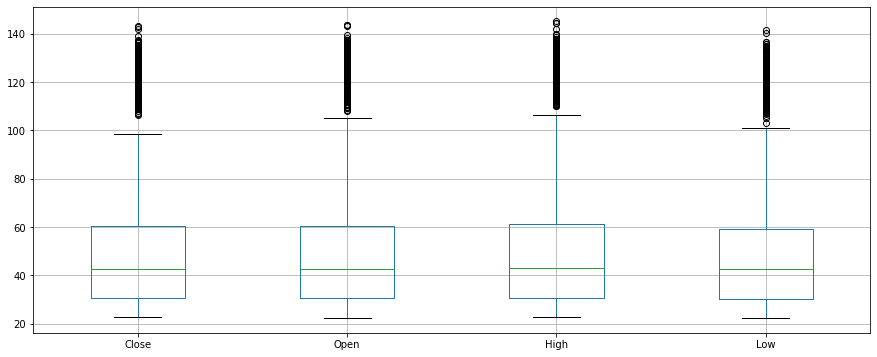

In [25]:
apple_cleaned.boxplot(figsize=(15,6))

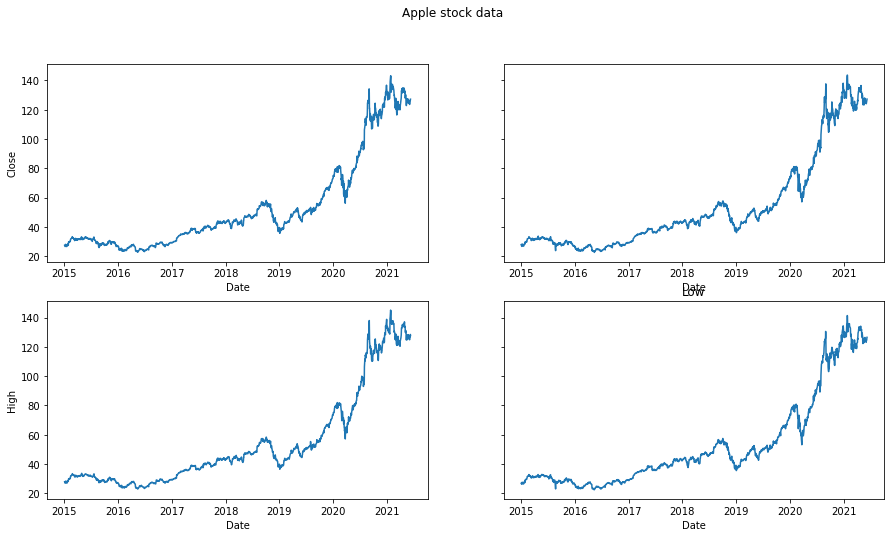

In [27]:
fig, axes = plt.subplots(2, 2,figsize=(15,8), sharey=True)
fig.suptitle('Apple stock data')


sns.lineplot(ax=axes[0,0], x=apple_cleaned.index, y=apple_cleaned['Close'])
plt.title('Close/last')

sns.lineplot(ax=axes[0,1], x=apple_cleaned.index, y=apple_cleaned['Open'])
plt.title('Open')

sns.lineplot(ax=axes[1,0], x=apple_cleaned.index, y=apple_cleaned['High'])
plt.title('High')

sns.lineplot(ax=axes[1,1], x=apple_cleaned.index, y=apple_cleaned['Low'])
plt.title('Low')

plt.show()

In [28]:
X = apple_cleaned.iloc[:,1:4]

In [29]:
Y = apple_cleaned.iloc[:,0]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3)

In [33]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1134, 3), (486, 3), (1134,), (486,))

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
model = lr.fit(xtrain,ytrain)

In [38]:
ypred = model.predict(xtest)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
lr.coef_

array([-0.52418477,  0.77360069,  0.74984314])

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [42]:
r2_score(ytest,ypred)

0.9997889406856828

In [43]:
mse_test = sqrt(mean_squared_error(ytest,ypred))
mse_test

0.48464462328431235

In [44]:
mse_train = sqrt(mean_squared_error(ytrain,model.predict(xtrain)))
mse_train 

0.48143174692536966